In [1]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import cv2

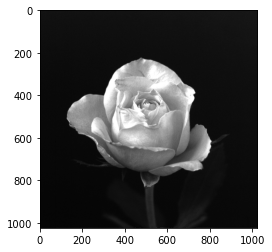

In [2]:
# Step 1

image = cv2.imread('D:/Education/_Masters/3rd Semester - Spring 2021/Introduction to Robot Vision System/Assignment 1/Rose-BMP.bmp', cv2.COLOR_BGR2GRAY) # Write ", cv2.COLOR_BGR2GRAY" or just simply "0"
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [3]:
print(image.shape)

(1024, 1024)


In [4]:
def applythreshold(image, threshold_value):
    
    new_image = image.copy()
    
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            if image[x][y] < 200:
                new_image[x][y] = 0
    
    return new_image

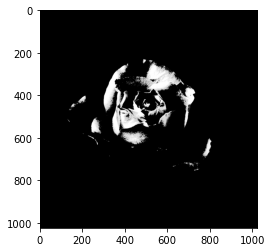

In [5]:
binary_image = applythreshold(image, 200)
plt.imshow(cv2.cvtColor(binary_image, cv2.COLOR_BGR2RGB))

In [6]:
m, n = image.shape # m is vertical, n is horizontal dimension

In [7]:
def neighbor(j,i,label): # j is row, i is column
    # left
    left = label[i,j-1] # first one is the row, so we have to keep it the same; second one is the column, so we change it.
    # above
    above = label[i-1,j]
    above_left = label[i-1,j-1]
    above_right = label[i-1, j+1]
    
    neighbor_array = [left, above, above_left, above_right]
    return neighbor_array

In [8]:
def eight_way_neighbor(j, i, label): 
    left = label[i,j-1]
    above = label[i-1,j]
    right = label[i,j+1]
    below = label[i+1,j]
    above_left = label[i-1,j-1]
    above_right = label[i-1, j+1]
    below_left = label[i+1,j-1]
    below_right = label[i+1,j+1]
    
    eight_way_array = [left, above, right, below, above_left, above_right, below_left, below_right]
    
    return eight_way_array

In [9]:
def first_non_zero(data):
    
    data.sort()
    value = np.nonzero(data)[0][0]
    return value

In [10]:
def connectedcomponents(image):
   
    label = np.ones([m, n])
    new = 0
    
    
    
    for row in range(m): # row is constant and column is changing here.
        for column in range(n):
            
            if image[row,column] == [0] :
                label[row, column] = 0
                
            else:
                current_neighbor = neighbor(row, column, label)
                
                if np.max(current_neighbor) == 0:
                    new = new + 1
                    label[row, column] = new
                
                else:
                    if np.min(current_neighbor) != 0:
                        label[row, column] = np.min(current_neighbor)
                    
                    else:
                        label[row, column] = first_non_zero(current_neighbor)
                    
    # Second pass
    
    for row in range(m):
        for column in range(n):
            
            if label[row,column] == [0] :
                label[row, column] = 0
            
            else:
                eight_way_neighbor_array = eight_way_neighbor(row, column, label)
                
                if np.max(eight_way_neighbor_array) == 0:
                    label[row, column] = label[row, column]
                    
                else: # in case values are like = [0, 1, 2, 1, 3]. We don't want to make it a null pixel which is '0'. We want to give it a '1'.
                    value_to_assign = first_non_zero(eight_way_neighbor_array) # value to assign
                    label[row,column] = value_to_assign
        
                        
    return label

In [11]:
cc_image = connectedcomponents(binary_image)

In [12]:
def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    cv2.imshow('labeled.png', labeled_img)
    cv2.waitKey()

imshow_components(cc_image)

In [13]:
items, count = np.unique(cc_image, return_counts=True) 

In [14]:
unwanted_numbers = []

for number, value in zip(items, count):
    
    if value < 2:
        unwanted_numbers.append(number) # these are the values that should be deleted wherever they are in the array.
        
#print(unwanted_numbers)
wanted_numbers = [0] * len(unwanted_numbers)

In [15]:
for i in range(len(unwanted_numbers)):
    cc_image[cc_image == unwanted_numbers[i]] = wanted_numbers[i]

In [17]:
print("Number of Components", np.size(np.unique(cc_image)))

Number of Components 8


In [27]:
imshow_components(cc_image)

In [28]:
final_image = np.copy(cc_image)

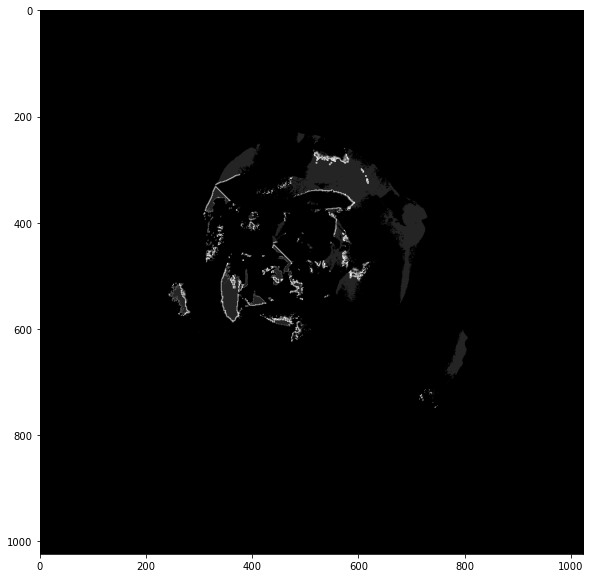

In [29]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
plt.imshow(final_image, cmap='gray')